# Hedges
Do female characters use more hedges? Let's find out!

In [1]:
import pandas as pd

In [2]:
movies_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_movies_2.pkl")

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 22 columns):
Disney_Period         13442 non-null object
Gender                13442 non-null object
Movie                 13442 non-null object
Role                  13442 non-null object
Song                  13442 non-null object
Speaker               13442 non-null object
Speaker_Status        13442 non-null object
Text                  13442 non-null object
UTTERANCE_NUMBER      13442 non-null int64
Year                  13442 non-null int64
Tokens                13442 non-null object
Types                 13442 non-null object
Token_Count           13442 non-null int64
Type_Count            13442 non-null int64
POS                   13442 non-null object
Tag_Freq              13442 non-null object
Command_Count         13442 non-null int64
Top_Tag               13442 non-null object
Adj_Count             13442 non-null int64
Adj_over_Tokens       13442 non-null float64
Interjection_Cou

In [4]:
#First, make a list of hedges
hedge_list = ['i believe', 'i guess', 'i suppose', 'maybe', 'might', 'may', 
         'possibly', 'perhaps', "i don't know","i do not know",
         "i'm not sure", "i am not sure", "i think","i don't think", "i do not think", 'seems', 'kind of',
        'in my opinion', 'sort of', 'would', 'could', 'well', 'a bit',
             'a little', 'almost', 'actually', 'apparently', 'somewhat']

In [5]:
hedge_lines = []
for line in movies_df.Text:
    for hedge in hedge_list:
        if hedge in line:
            hedge_lines.append(line)

In [6]:
well_lines = []
for line in movies_df.Text:
    if 'well' in line:
        well_lines.append(line)

In [7]:
len(hedge_lines) #1570

1814

In [8]:
len(well_lines)

474

In [9]:
well_lines

['well, uh, uh ',
 "well, my dear quincess uh, princess. we're, uhwe're honored. yes, we're ",
 "well, aren't you going to wash ? what's the matter ? cat got your tongue ? ",
 "well, iit'll please the princess. ",
 "now scrub good and hard it can't be denied that he'll look mighty cute as soon as he's dried well, it's good for the soul and it's good for the hide ",
 'magic mirror on the wall, who now is the fairest one of all ? over the seven jewelled hills, beyond the seventh fall, in the cottage of the seven dwarfs, dwells snow white, fairest one of all. ',
 "a blast of wind... to fan my hate ! a thunderbolt... to mix it well. now... begin thy magic spell. look ! my hands ! my voice ! my voice ! a perfect disguise. and now, a special... sort of death for one so fair. what shall it be ? ah ! a poisoned apple ! sleeping death. one taste of the poisoned apple... and the victim's eyes will close forever... in the sleeping death. ",
 'well, what shall i do ? ',
 'well, once there was a pr

In [10]:
hedge_lines[:100]

['what wouldst thou know, my queen ? ',
 "hello there. what's the matter ? where's your mama and papa ? why, i believe you're lost. oh, please, don't cry. come on. perk up. won't you smile for me ? that's better. your mama and papa can't be far. there they are. can you fly ? goodbye. goodbye ! ",
 "i can't sleep in the ground like you. or in a tree the way you do. and i'm sure no nest would possibly be big enough for me. maybe you know where i can stay. in the woods somewhere ? ",
 "i can't sleep in the ground like you. or in a tree the way you do. and i'm sure no nest would possibly be big enough for me. maybe you know where i can stay. in the woods somewhere ? ",
 "i can't sleep in the ground like you. or in a tree the way you do. and i'm sure no nest would possibly be big enough for me. maybe you know where i can stay. in the woods somewhere ? ",
 "i can't sleep in the ground like you. or in a tree the way you do. and i'm sure no nest would possibly be big enough for me. maybe you k

In [11]:
def find_hedges(line):
    hedge_count = 0
    for hedge in hedge_list:
        if hedge in line:
            hedge_count += 1
    return hedge_count

In [12]:
movies_df['Hedges'] = movies_df.Text.map(lambda x: find_hedges(x))

In [13]:
movies_df.Hedges.describe()

count    13442.00000
mean         0.13495
std          0.42861
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          4.00000
Name: Hedges, dtype: float64

In [14]:
movies_df.groupby('Gender')['Hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,4216.0,0.135436,0.429534,0.0,0.0,0.0,0.0,4.0
m,8914.0,0.137424,0.432944,0.0,0.0,0.0,0.0,4.0
n,312.0,0.057692,0.246920,0.0,0.0,0.0,0.0,2.0


## Graphs

In [15]:
from matplotlib import pyplot as plt

In [16]:
#only comparing male female, pro, ant, and helpers
movies_gen_df = movies_df[movies_df.Gender != 'n']
movies_role_df = movies_df[movies_df.Role != 'N']

In [17]:
movies_gen_role_df = movies_df[(movies_df.Gender != 'n') & (movies_df.Role != 'N')]

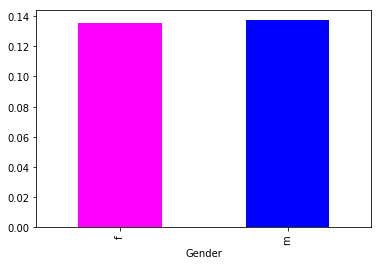

In [18]:
hedge_by_gen = movies_gen_df.groupby('Gender')['Hedges'].describe()['mean']
hedge_by_gen.plot.bar(color=['magenta', 'blue'])

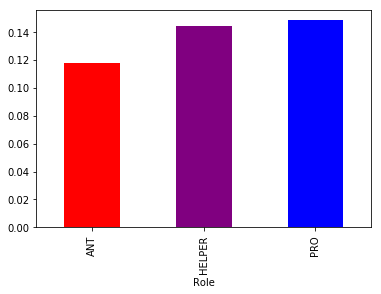

In [19]:
hedge_by_role = movies_role_df.groupby('Role')['Hedges'].describe()['mean']
hedge_by_role.plot.bar(color=['red', 'purple', 'blue'])

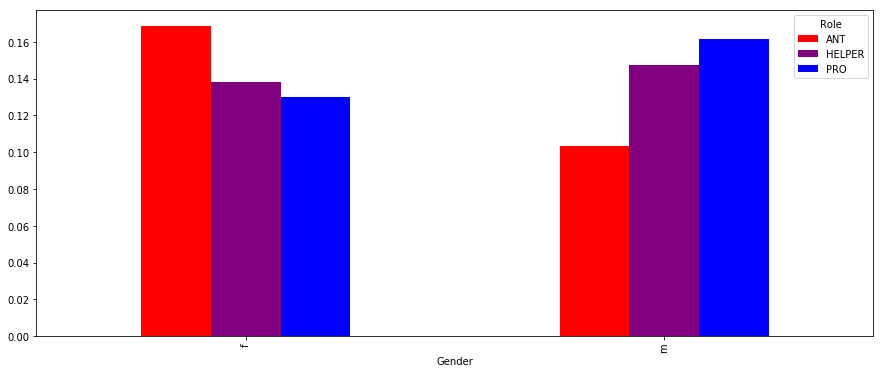

In [20]:
hedge_by_role_gen = movies_gen_role_df.groupby(['Gender', 'Role'])['Hedges'].describe()['mean']
hedge_by_role_gen.unstack().plot.bar(color = ['red', 'purple', 'blue'], figsize=(15,6))

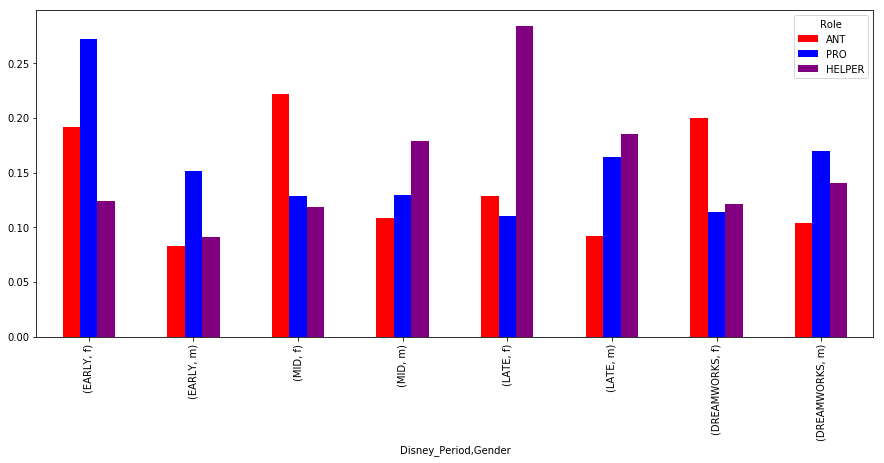

In [21]:
hedge_by_role_gen = movies_gen_role_df.groupby(['Disney_Period','Gender', 'Role'], sort=False)['Hedges'].describe()['mean']
hedge_by_role_gen.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15, 6))

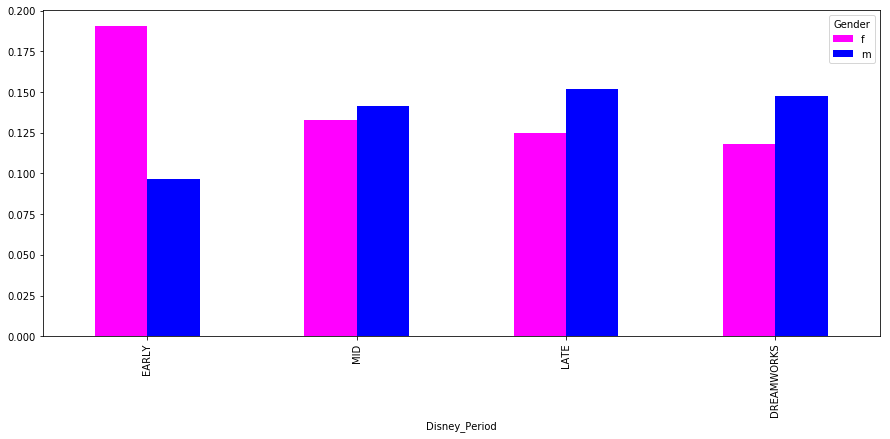

In [22]:
hedge_by_era_gen = movies_gen_role_df.groupby(['Disney_Period','Gender'], sort=False)['Hedges'].describe()['mean']
hedge_by_era_gen.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15, 6))

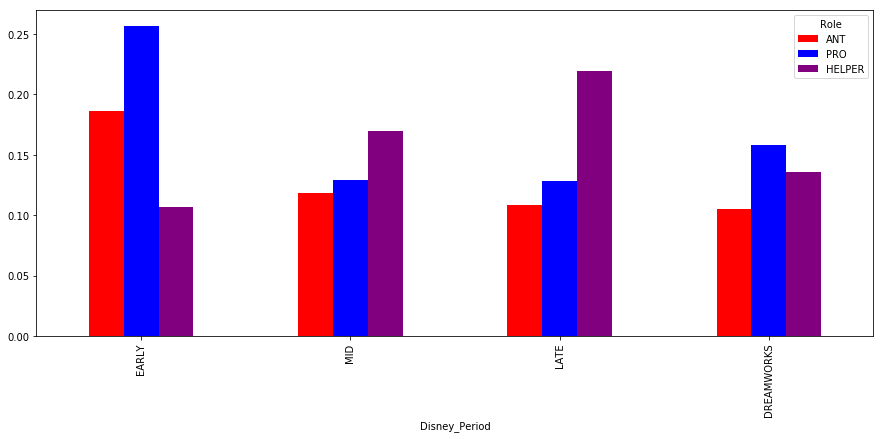

In [23]:
hedge_by_era_role = movies_gen_role_df.groupby(['Disney_Period','Role'], sort=False)['Hedges'].describe()['mean']
hedge_by_era_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15, 6))

## Statistical Tests

In [24]:
from scipy import stats

In [25]:
f_movies = movies_df[movies_df.Gender == 'f']
m_movies = movies_df[movies_df.Gender == 'm']

In [26]:
pro_movies = movies_df[movies_df.Role == 'PRO']
ant_movies = movies_df[movies_df.Role == 'ANT']
helper_movies = movies_df[movies_df.Role == 'HELPER']

### Gender
#### Overall

In [27]:
#Between male and female characters overall
stats.ttest_ind(m_movies.Hedges, f_movies.Hedges, equal_var=False) #no significant difference!

Ttest_indResult(statistic=0.2469620927809358, pvalue=0.8049436474853342)

Overall, female speakers actually use slightly fewer hedges than male characters, but this difference isn't signficant.

In [28]:
#female lines in each era
f_movies_early = f_movies[f_movies.Disney_Period == 'EARLY']
f_movies_mid = f_movies[f_movies.Disney_Period == 'MID']
f_movies_late = f_movies[f_movies.Disney_Period == 'LATE']

In [29]:
#male lines in each era
m_movies_early = m_movies[m_movies.Disney_Period == 'EARLY']
m_movies_mid = m_movies[m_movies.Disney_Period == 'MID']
m_movies_late = m_movies[m_movies.Disney_Period == 'LATE']

#### Female Hedges over Time

In [30]:
stats.f_oneway(f_movies_early.Hedges, f_movies_mid.Hedges, f_movies_late.Hedges)

F_onewayResult(statistic=5.6595407963416315, pvalue=0.003522764212710435)

In [31]:
stats.ttest_ind(f_movies_early.Hedges, f_movies_mid.Hedges, equal_var=False)

Ttest_indResult(statistic=2.2384771375980987, pvalue=0.025353734146271602)

In [32]:
stats.ttest_ind(f_movies_early.Hedges, f_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=3.016712773628267, pvalue=0.002611403475179962)

In [33]:
stats.ttest_ind(f_movies_mid.Hedges, f_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=0.6795108932552569, pvalue=0.4969138536364116)

Overall, there appears to be a significant difference between hedge counts over time (saving between the middle era and the late era). In all two-way comparisons, the previous era's women used more hedges than the next era's women. This difference is signifcant between the early and late eras, and between the early and mid eras.

#### Male Hedges over Time

In [34]:
stats.f_oneway(m_movies_early.Hedges, m_movies_mid.Hedges, m_movies_late.Hedges)

F_onewayResult(statistic=0.2221677266945154, pvalue=0.80079144959515)

No siginificant three way difference. Let's narrow this.

In [35]:
stats.ttest_ind(m_movies_early.Hedges, m_movies_mid.Hedges, equal_var=False)

Ttest_indResult(statistic=-0.7072785026779612, pvalue=0.4795860133720917)

In [36]:
stats.ttest_ind(m_movies_early.Hedges, m_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=-0.5958435607406146, pvalue=0.5513981572426254)

In [37]:
stats.ttest_ind(m_movies_mid.Hedges, m_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=0.059293316253933206, pvalue=0.9527234295015778)

So, there is a significant difference between female hedge counts overtime, but not between male hedges over time.

#### Male vs Female Hedges Over Time

In [38]:
stats.ttest_ind(m_movies_early.Hedges, f_movies_early.Hedges, equal_var=False)

Ttest_indResult(statistic=-2.7253914583319436, pvalue=0.006514319527192338)

In [39]:
stats.ttest_ind(m_movies_mid.Hedges, f_movies_mid.Hedges, equal_var=False)

Ttest_indResult(statistic=-0.09928578156072795, pvalue=0.9209256989829391)

In [40]:
stats.ttest_ind(m_movies_late.Hedges, f_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=0.5861560626639634, pvalue=0.5578236553283782)

Here, we see that the difference between how genders use hedges has changed over time. While men used signficantly fewer hedges than women in Disney's early period, this difference isn't significant in the mid and late periods.

### Role
#### Role Overall

In [41]:
stats.f_oneway(pro_movies.Hedges, ant_movies.Hedges, helper_movies.Hedges) #hardly

F_onewayResult(statistic=3.6756230461575, pvalue=0.025363790083959573)

In [42]:
stats.f_oneway(pro_movies.Hedges, ant_movies.Hedges) #yep!

F_onewayResult(statistic=7.307846028743817, pvalue=0.006880299468160047)

In [43]:
stats.f_oneway(pro_movies.Hedges, helper_movies.Hedges) #nope!

F_onewayResult(statistic=0.16605292893885215, pvalue=0.6836531567434658)

In [44]:
stats.f_oneway(helper_movies.Hedges, ant_movies.Hedges) #hardly

F_onewayResult(statistic=5.004835701407097, pvalue=0.025315906624021504)

Overall, it seems that a characters role DOES factor into how hedges are used. This difference is most significant between protagonists and antagonists. Protagonists use WAY more hedges than antagonists do. There's a slight significant difference between how helpers and antagonists use hedges.

#### Antagonist Hedges Over Time

In [45]:
ant_movies_early = ant_movies[ant_movies.Disney_Period == 'EARLY']
ant_movies_mid = ant_movies[ant_movies.Disney_Period == 'MID']
ant_movies_late = ant_movies[ant_movies.Disney_Period == 'LATE']

pro_movies_early = pro_movies[pro_movies.Disney_Period == 'EARLY']
pro_movies_mid = pro_movies[pro_movies.Disney_Period == 'MID']
pro_movies_late = pro_movies[pro_movies.Disney_Period == 'LATE']

In [46]:
stats.f_oneway(ant_movies_early.Hedges, ant_movies_mid.Hedges, ant_movies_late.Hedges) #hardly

F_onewayResult(statistic=3.094019776389704, pvalue=0.04569721091887875)

A barely siginificant three way difference. Let's narrow this.

In [47]:
stats.ttest_ind(ant_movies_early.Hedges, ant_movies_mid.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=1.9028693774936443, pvalue=0.05793014637492616)

In [48]:
stats.ttest_ind(ant_movies_early.Hedges, ant_movies_late.Hedges, equal_var=False) #hardly

Ttest_indResult(statistic=2.117931681012448, pvalue=0.03488583820111598)

In [49]:
stats.ttest_ind(ant_movies_mid.Hedges, ant_movies_late.Hedges, equal_var=False)

Ttest_indResult(statistic=0.3877004825746063, pvalue=0.6983308660519401)

The only significant difference here is between the early and late periods. Between the early and late Disney Eras, an antagonist's use of hedges has gone down.

#### Protagonist Hedges Over Time

In [50]:
stats.f_oneway(pro_movies_early.Hedges, pro_movies_mid.Hedges, pro_movies_late.Hedges) #way more significant

F_onewayResult(statistic=9.444192562649363, pvalue=8.150321171548169e-05)

Looks like in general, there's a significant difference between how protagonists use hedges over time

In [51]:
stats.ttest_ind(pro_movies_early.Hedges, pro_movies_mid.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=3.0252979699324833, pvalue=0.002699377171164294)

In [52]:
stats.ttest_ind(pro_movies_early.Hedges, pro_movies_late.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=3.0646434604844344, pvalue=0.002385066649681018)

In [53]:
stats.ttest_ind(pro_movies_mid.Hedges, pro_movies_late.Hedges, equal_var=False) #NOPE!

Ttest_indResult(statistic=0.030737401891905363, pvalue=0.9754813625233696)

While protagonists' use of hedges over time has decreased, there's no significant difference between the mid and late periods.

#### Antagonists vs Protagonists Over Time

In [54]:
stats.ttest_ind(pro_movies_early.Hedges, ant_movies_early.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=1.3772703300759517, pvalue=0.1691056541760526)

In [55]:
stats.ttest_ind(pro_movies_mid.Hedges, ant_movies_mid.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=0.5404663225220979, pvalue=0.5889807618852014)

In [56]:
stats.ttest_ind(pro_movies_late.Hedges, ant_movies_late.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=0.9488262147956816, pvalue=0.3430218543787952)

Within each period, there is no significant difference between how often protagonists and antagonists use hedges.

#### By Gender and Role Overall

In [57]:
pro_f = movies_gen_role_df[(movies_gen_role_df.Gender == 'f') & (movies_gen_role_df.Role == 'PRO')]
pro_m = movies_gen_role_df[(movies_gen_role_df.Gender == 'm') & (movies_gen_role_df.Role == 'PRO')]
ant_f = movies_gen_role_df[(movies_gen_role_df.Gender == 'f') & (movies_gen_role_df.Role == 'ANT')]
ant_m = movies_gen_role_df[(movies_gen_role_df.Gender == 'm') & (movies_gen_role_df.Role == 'ANT')]

In [58]:
stats.ttest_ind(pro_f.Hedges, pro_m.Hedges, equal_var=False) 
#female protagonists actually significantly fewer hedges than male protagonists

Ttest_indResult(statistic=-2.657857935520071, pvalue=0.00788654862209923)

In [59]:
stats.ttest_ind(ant_f.Hedges, ant_m.Hedges, equal_var=False)
#female antagonists use significantly more hedges than male antagonists

Ttest_indResult(statistic=2.8235126674682194, pvalue=0.004906077892619274)

In [60]:
stats.ttest_ind(pro_f.Hedges, ant_f.Hedges, equal_var=False)

Ttest_indResult(statistic=-1.6810711203041597, pvalue=0.09326552118381613)

In [61]:
stats.ttest_ind(pro_m.Hedges, ant_m.Hedges, equal_var=False)

Ttest_indResult(statistic=4.852799960275065, pvalue=1.2626701770944547e-06)

The most significant difference here is between male protagonists and antagonists, with male protagonists using significantly more hedges than male antagonists. Unlike what I predicted, female protagonists use fewer hedges than male protagonists, but female antagonists use more hedges than male antagonists. 

#### Across Companies

In [62]:
#### Across Companies
disney_f = movies_gen_df[(movies_gen_df.Gender == 'f') & (movies_gen_df.Disney_Period != 'DREAMWORKS')]
disney_m = movies_gen_df[(movies_gen_df.Gender == 'm') & (movies_gen_df.Disney_Period != 'DREAMWORKS')]
dw_f = movies_gen_df[(movies_gen_df.Gender == 'f') & (movies_gen_df.Disney_Period == 'DREAMWORKS')]
dw_m = movies_gen_df[(movies_gen_df.Gender == 'm') & (movies_gen_df.Disney_Period == 'DREAMWORKS')]

In [63]:
stats.ttest_ind(disney_m.Hedges, disney_f.Hedges, equal_var=False) # no significant difference

Ttest_indResult(statistic=-1.0317972731113227, pvalue=0.30220807795419546)

In [64]:
stats.ttest_ind(disney_f.Hedges, dw_f.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=1.7994150694838413, pvalue=0.0720606462571984)

In [65]:
stats.ttest_ind(disney_m.Hedges, dw_m.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=-1.0057762192837578, pvalue=0.3145523594115714)

In [66]:
stats.ttest_ind(dw_m.Hedges, dw_f.Hedges, equal_var=False) #nope (but closer)
#slightly fewer hedges for female Dreamworks characters

Ttest_indResult(statistic=1.8193724786492282, pvalue=0.06898961209844319)

There are no significant differences based on gender across companies. What about role across companies?

In [67]:
disney_pro = movies_role_df[(movies_role_df.Role == 'PRO') & (movies_role_df.Disney_Period != 'DREAMWORKS')]
disney_ant = movies_role_df[(movies_role_df.Role == 'ANT') & (movies_role_df.Disney_Period != 'DREAMWORKS')]
dw_pro = movies_role_df[(movies_role_df.Role == 'PRO') & (movies_role_df.Disney_Period == 'DREAMWORKS')]
dw_ant = movies_role_df[(movies_role_df.Role == 'ANT') & (movies_role_df.Disney_Period == 'DREAMWORKS')]

In [68]:
stats.ttest_ind(disney_pro.Hedges, disney_ant.Hedges, equal_var=False) # no significant difference

Ttest_indResult(statistic=0.8490117171303687, pvalue=0.39595950024822624)

In [69]:
stats.ttest_ind(disney_pro.Hedges, dw_pro.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=-1.5261224931344504, pvalue=0.12703518983467532)

In [70]:
stats.ttest_ind(disney_ant.Hedges, dw_ant.Hedges, equal_var=False) #nope

Ttest_indResult(statistic=1.3526068416036885, pvalue=0.1763372836862861)

In [71]:
stats.ttest_ind(dw_pro.Hedges, dw_ant.Hedges, equal_var=False) #YES!
#Dreamworks antagonists use fewer hedges than Dreamworks protagonists

Ttest_indResult(statistic=3.5173173882639257, pvalue=0.0004461956874139189)

Overall, disney antagonists use fewer hedges than dreamworks protagonists!

#### Gender and Role Over Time?

In [72]:
early_pro_f = pro_f[pro_f.Disney_Period == 'EARLY']
early_pro_m = pro_m[pro_m.Disney_Period == 'EARLY']
early_ant_f = ant_f[ant_f.Disney_Period == 'EARLY']
early_ant_m = ant_m[ant_m.Disney_Period == 'EARLY']
mid_pro_f = pro_f[pro_f.Disney_Period == 'MID']
mid_pro_m = pro_m[pro_m.Disney_Period == 'MID']
mid_ant_f = ant_f[ant_f.Disney_Period == 'MID']
mid_ant_m = ant_m[ant_m.Disney_Period == 'MID']
late_pro_f = pro_f[pro_f.Disney_Period == 'LATE']
late_pro_m = pro_m[pro_m.Disney_Period == 'LATE']
late_ant_f = ant_f[ant_f.Disney_Period == 'LATE']
late_ant_m = ant_m[ant_m.Disney_Period == 'LATE']

In [73]:
#Female protagonists over time
stats.f_oneway(early_pro_f.Hedges, mid_pro_f.Hedges, late_pro_f.Hedges) #BIG DIFF!

F_onewayResult(statistic=12.652822801092597, pvalue=3.484117574777012e-06)

In [74]:
stats.ttest_ind(early_pro_f.Hedges, mid_pro_f.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=3.0121236492995873, pvalue=0.0028262890432808204)

In [75]:
stats.ttest_ind(early_pro_f.Hedges, late_pro_f.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=3.5239181720715123, pvalue=0.0005048151598806205)

In [76]:
stats.ttest_ind(mid_pro_f.Hedges, late_pro_f.Hedges, equal_var=False) #no significant difference

Ttest_indResult(statistic=0.9029935180295494, pvalue=0.3667234514687845)

Female protagonists have used fewer hedges over time

In [77]:
#Now looking at Male Protagonists over Time
stats.f_oneway(early_pro_m.Hedges, mid_pro_m.Hedges, late_pro_m.Hedges) #nope!

F_onewayResult(statistic=0.8258404676582642, pvalue=0.4381216813491221)

In [78]:
stats.ttest_ind(early_pro_m.Hedges, mid_pro_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=0.2472625465275367, pvalue=0.8061697898537192)

In [79]:
stats.ttest_ind(early_pro_m.Hedges, late_pro_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=-0.14346358227971812, pvalue=0.8867271246350118)

In [80]:
stats.ttest_ind(mid_pro_m.Hedges, late_pro_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=-1.2802018327567484, pvalue=0.20074947382480068)

Male protagonists have not changed how often they use hedges over time

In [81]:
#Between male and female protagonists in each era!
stats.ttest_ind(early_pro_f.Hedges, early_pro_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=1.2250333335790506, pvalue=0.2263169199387521)

In [82]:
stats.ttest_ind(mid_pro_f.Hedges, mid_pro_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=-0.011337807706137355, pvalue=0.990955895187666)

In [83]:
stats.ttest_ind(late_pro_f.Hedges, late_pro_m.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=-2.216523936380611, pvalue=0.026902136906228856)

Within each era, whether the protagonists are male or female makes no significant difference in their use of hedges EXCEPT for the late era! In the late era, female protagonists use significantly fewer hedges than male protagonists

Between Female Antagonists over Time

In [84]:
#Female antagonists over time
stats.f_oneway(early_ant_f.Hedges, mid_ant_f.Hedges, late_ant_f.Hedges) #NO DIFF!

F_onewayResult(statistic=1.3037643965792944, pvalue=0.2725739208439333)

In [85]:
stats.ttest_ind(early_ant_f.Hedges, mid_ant_f.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=-0.31595171401140276, pvalue=0.7531958604556679)

In [86]:
stats.ttest_ind(early_ant_f.Hedges, late_ant_f.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=1.4474993879594127, pvalue=0.14857302364450664)

In [87]:
stats.ttest_ind(mid_ant_f.Hedges, late_ant_f.Hedges, equal_var=False) #no significant difference

Ttest_indResult(statistic=1.00076203073948, pvalue=0.3214449536053082)

Between Male Antagonists over Time

In [88]:
#Male protagonists over time
stats.f_oneway(early_ant_m.Hedges, mid_ant_m.Hedges, late_ant_m.Hedges) #NO DIFF!

F_onewayResult(statistic=0.20189019254829482, pvalue=0.8172312898153247)

In [89]:
stats.ttest_ind(early_ant_m.Hedges, mid_ant_m.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=-0.29815205178739274, pvalue=0.7707822031695627)

In [90]:
stats.ttest_ind(early_ant_m.Hedges, late_ant_m.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=-0.10255770838011026, pvalue=0.9199351442931645)

In [91]:
stats.ttest_ind(mid_ant_m.Hedges, late_ant_m.Hedges, equal_var=False) #no significant difference

Ttest_indResult(statistic=0.61545953202014, pvalue=0.5385684922465015)

Between Male Antagonists and Protagonists over Time

In [92]:
#Differences in Hedge Use by Male Role Over Time
stats.ttest_ind(early_pro_m.Hedges, early_ant_m.Hedges, equal_var=False) #NO DIFF!

Ttest_indResult(statistic=0.5614045753966249, pvalue=0.578140304076032)

In [93]:
stats.ttest_ind(mid_pro_m.Hedges, mid_ant_m.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=0.8862176418871234, pvalue=0.37569871882651207)

In [94]:
stats.ttest_ind(late_pro_m.Hedges, late_ant_m.Hedges, equal_var=False) #yep!

Ttest_indResult(statistic=2.3719856463463365, pvalue=0.018000706458107793)

Male protagonists are hedging way more than male antagonists in the late period

Between Female Antagonists and Protagonists Over Time

In [95]:
#Differences in Hedge Use by Female Role Over Time
stats.ttest_ind(early_pro_f.Hedges, early_ant_f.Hedges, equal_var=False) #NO DIFF!

Ttest_indResult(statistic=1.4490076617766339, pvalue=0.14812366167355862)

In [96]:
stats.ttest_ind(mid_pro_f.Hedges, mid_ant_f.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=-1.0259178734335812, pvalue=0.31015000881579863)

In [97]:
stats.ttest_ind(late_pro_f.Hedges, late_ant_f.Hedges, equal_var=False) #NO!

Ttest_indResult(statistic=-0.5844555435884148, pvalue=0.55942973446435)

Between Female Antagonists and Male Antagonists over Time:

In [98]:
#Between male and female antagonists in each era!
stats.ttest_ind(early_ant_f.Hedges, early_ant_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=1.2121514634083763, pvalue=0.24448107546200057)

In [99]:
stats.ttest_ind(mid_ant_f.Hedges, mid_ant_m.Hedges, equal_var=False) #nope!

Ttest_indResult(statistic=1.2539533031171692, pvalue=0.21610027210517013)

In [100]:
stats.ttest_ind(late_ant_f.Hedges, late_ant_m.Hedges, equal_var=False) #NOPE!

Ttest_indResult(statistic=1.0017480871923357, pvalue=0.3171419240973086)

Within each era, whether the antagonist is male or female makes no difference in hedge use.